# Classical Harmonic Oscillator


:::{admonition} **What You Need to Know**
:class: note


- **Equation of Motion:**
  - Derived from Hooke’s law, $F = -kx$, leading to the second-order differential equation $ m \ddot{x} + kx = 0 $ governing simple harmonic motion (SHM).
  
- **Solution to the Oscillator:**
  - The general solution is $ x(t) = A \cos(\omega t + \phi) $, with $ \omega = \sqrt{k/m} $. The amplitude $ A $ and phase $ \phi $ depend on initial conditions.

- **Energy in Oscillation:**
  - Kinetic energy, $ T = \frac{1}{2} m v^2 $, and potential energy, $ U = \frac{1}{2} k x^2 $, exchange throughout the motion, while total energy remains constant.

- **Oscillation Parameters:**
  - Key parameters include angular frequency $ \omega $, frequency $ f = \frac{\omega}{2\pi} $, and period $ T = \frac{2\pi}{\omega} $.

- **Damped and Driven Oscillations:**
  - Discuss damping (energy dissipation) and resonance in driven systems, highlighting underdamped, overdamped, and critically damped cases.

- **Examples and Applications:**
  - Includes mass-spring systems, pendulums (small angles), and LC circuits. Emphasizes the harmonic oscillator’s role in describing oscillations across different physical systems.

:::


### Bead, spring and a wall. 

- The classical **harmonic oscillator** is a system of bead attached to a wall with a spring. 
- When bead is displaced from its equilibrium or resting position $r_0$ to some point $r$, experiences a restoring force $F$ proportional to the displacement $x=r-r_0$:


:::{figure-md} markdown-fig

<img src="images/harm-osc1.png" alt="compton" class="bg-primary mb-1" width="500px">

Illustration of harmonic motion governed by Hook's law. Any deviation from equilibrium (resting) position is met with restoring force. In the absence of friction the bead keeps oscillating around equilibrium position. 

:::



$$
F=-kx
$$

- This is **Hooke's law**, where minus sign indicates that the direction of force is always towards restoring equilibrium location. 
- The constant k characterizes stiffness of the spring and is called **spring constant.**

### Solving harmonic oscillator problem

- The classical equation of motion for a one-dimensional simple harmonic oscillator with a particle of mass m attached to a spring having spring constant k generates mechanical waves.

$$m \ddot x=−kx$$

$$m \ddot x+kx = 0 \,\,\,\,\rightarrow \,\,\,\, \ddot{x}+\omega^2 x =0$$

- The intorduced constant $\omega$ will be seen as the **frequency oscillations**.Note that frequency is inversly porportional to mass (heavier objects with same spring constant oscillate rapdily around equilibrium) and proprotional to spring constant (stiffer springs increase oscillations around equilibrium for same mass)

$$\omega=\Big(\frac{k}{m}\Big)^{1/2}$$

- The differneital equation is a simple second order, linear ODE  which can be solved by a standard trick of pluggin exponential $x(t)=e^{\alpha t}$ and convertin the problem to algebraic equation. The solution is

$$
x(t)= A sin(\omega t+\phi)
$$ 

- The two constnants  are: $A$ the **amplitude of oscillations** and $\phi$ is constant specifying the initial position of the bead. 

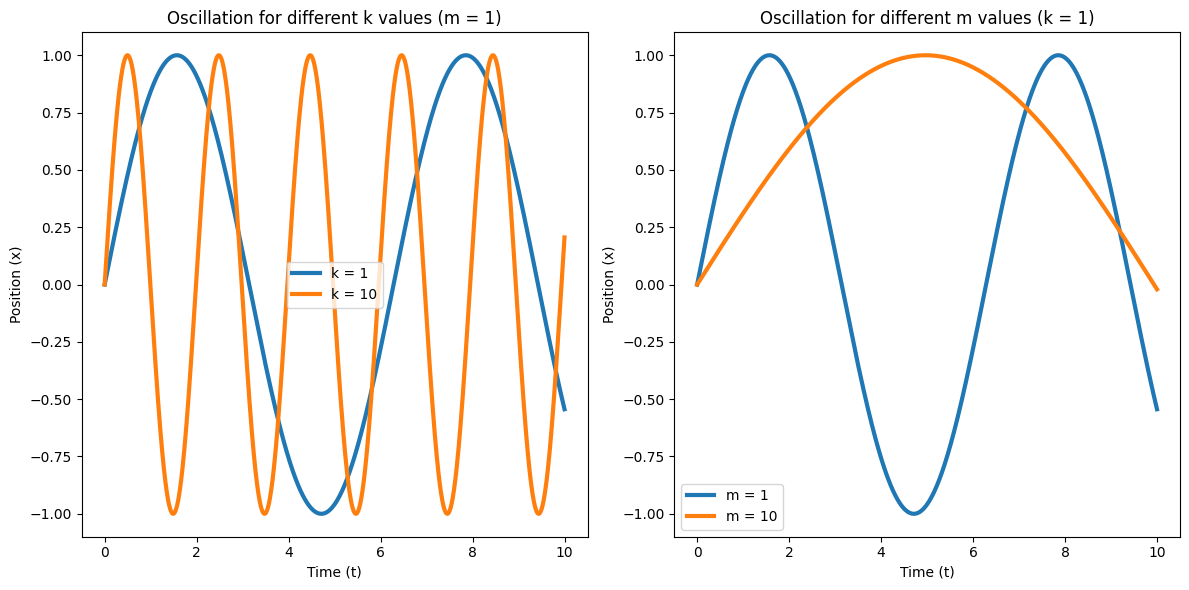

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

def sho_anim(m, k=1.0, A=0.9, phi=0.0, duration=4.0, fps=30):
    ω = np.sqrt(k/m)
    t = np.linspace(0, duration, int(fps*duration))
    x = A*np.sin(ω*t + phi)

    fig, axes = plt.subplots(1, 2, figsize=(8, 2.5))
    ax_mass, ax_wave = axes

    # --- left: oscillating mass ---
    ax_mass.set_xlim(-1.2, 1.2)
    ax_mass.set_ylim(-0.5, 0.5)
    ax_mass.axis("off")
    ax_mass.set_title(f"Mass–Spring (m={m:g})")
    (mass_point,) = ax_mass.plot([], [], "o", ms=12)
    (trace_line,) = ax_mass.plot([], [], lw=2)

    # --- right: sinusoidal wave ---
    ax_wave.set_xlim(0, duration)
    ax_wave.set_ylim(-1.2*A, 1.2*A)
    ax_wave.set_xlabel("time t")
    ax_wave.set_ylabel("x(t)")
    ax_wave.grid(True, ls="--", alpha=0.4)
    ax_wave.set_title("x(t) = A sin (ωt + φ)")
    (wave_line,) = ax_wave.plot([], [], lw=2)
    (wave_point,) = ax_wave.plot([], [], "o")

    def init():
        for line in (mass_point, trace_line, wave_line, wave_point):
            line.set_data([], [])
        return mass_point, trace_line, wave_line, wave_point

    def update(i):
        xi = x[i]
        mass_point.set_data([xi], [0])
        trace_line.set_data(x[:i+1], np.zeros(i+1))
        wave_line.set_data(t[:i+1], x[:i+1])
        wave_point.set_data([t[i]], [xi])
        return mass_point, trace_line, wave_line, wave_point

    return FuncAnimation(fig, update, init_func=init, frames=len(t), interval=1000/fps, blit=True)

# --- Two animations: normal mass and heavier mass ---
anim1 = sho_anim(m=1.0, duration=10.0)
anim2 = sho_anim(m=10.0, duration=10.0)  # slower oscillation

# Inline display in Jupyter / Jupyter Book
plt.close()  # Prevents static display of the last frame
HTML(anim1.to_jshtml() + "<br><hr><br>" + anim2.to_jshtml())



### Energy of the harmonic oscillator

- In classical mechanics when we have a conservative system (no frictions, energy conserved) the **force is a gradient of a potential energy**

$$F = - \frac{\partial V(x)}{\partial x}$$

- This means the steeper the potential the higher the force and minus sign indicates that force is restoring system to its equilibrium position. 

- The potential energy can be obtained by integrating:

$$ V(x)= - \int F dx = - \int (-kx) dx =\frac{kx^2}{2}+C$$

- Thus the potential energy for a simple harmonic oscillator is a parabolic function of displacement. It is  convenient  to set $C=0$ and measure potential energy relative to equilibrium state $V(x=0)=0$ 

- The total energy consisting of kinetic and potential enregies will be used to obtain Schordinger equation.

$$E=\frac{p^2}{2m} + \frac{kx^2}{2}$$

:::{figure-md} markdown-fig

<img src="https://www.physicslens.com/wp-content/uploads/2021/11/simple-harmonic-motion-graphs.gif" alt="compton" class="bg-primary mb-1" width="300px">

The harmonic oscilator (in a vacuum) is a conservative system becasue the kinetic and potential energies keep being interconverted with no amount of total energy being dissipated into the environment. Oscillations go on forever with position $x(t)$ velocity $v=\dot{x}(t)$ and acceleration $a=\ddot{x(t)}$ with same constant frequency $\omega$ but with different amplitudes.

:::


### Diatomic molecules and two-body problem

:::{figure-md} markdown-fig
<img src="images/osc-2.jpeg" alt="compton" class="bg-primary mb-1" width="300px">


- We can reduce the two body probelm of vibrating atoms to a one body problem of one atom with an effective reduced mass:  $\mu=\frac{1}{m_1}+\frac{1}{m_2}=\frac{m_1 m_2}{m_1+m_2}$

$$\ddot{x}=\ddot{x_2} - \ddot{x_1} =-\Big(\frac{1}{m_1}+\frac{1}{m_2} \Big)kx=-\frac{k}{\mu}x$$


:::{admonition} **Derivation**
:class: tip, dropdown

Equations of motion for diatomic molecule modeled as beads bound by a spring are:

$$F_1=m_1 \ddot{x_1}=k(x_2-x_1-l_0)$$

$$F_2=m_2 \ddot{x_2}=-k(x_2-x_1-l_0)$$

Where $F_1=-F_2$ which is a reflection of Newtno's thrid law. By introducing a more convenient cooridnates in the from of relative distance $x$ and center of mass $x_{com}$ we are now going to reduce the two body problem to one body problem.

$$x=x_2-x_1-l_0$$

$$x_{com}=\frac{m_1x_2+x_2 m_2}{m_1+m_2}$$
:::

- Diatomic molecule is stable because the same force is acting on both ends

$$m_1\ddot{x_1}=kx \\  m_2\ddot{x_2}=-kx$$

- By expressing equations of motion in terms of the center of mass which, we find that center of mass moves freely without acceleration. 

$$m_1\ddot{x_1}+ m_2\ddot{x_2}=0\,\,\,\, \rightarrow \frac{m_1\ddot{x_1}+ m_2\ddot{x_2}}{m_1+m_2}=\ddot{x}_{com}=0$$

- Next by taking difference between coordinates $\ddot{x_2}=-\frac{k}{m_2}x_2$ and  $\ddot{x_1}=\frac{k}{m_1}x_1$we expres  the equations of motion in terms of relative distance


$$\ddot{x}=\ddot{x_2} - \ddot{x_1} =-\Big(\frac{1}{m_1}+\frac{1}{m_2} \Big)kx=-\frac{k}{\mu}x$$

- This equation looks identical to the probem of bead anchored to wall with a spring. We have thus managed to reduce the two body probelm to a one modey problem by replacing masses of bodies with a reduced mass:  $\mu=\frac{1}{m_1}+\frac{1}{m_2}=\frac{m_1 m_2}{m_1+m_2}$
:::

### Beads and springs model of molecules

- Before discussing the harmonic oscillator approximation let us reflect on when this would be a good approximation and uner which cirumstances it will break down? For an aribtarry potential energy funciton of x we can carry out Taylor's expansion around equilibrium bond length $x_0$ obtaining infinitey series. 

$$U(x) = U(x_0)+U'(x_0)(x-x_0)+\frac{1}{2!}U''(x_0)(x-x_0)^2+\frac{1}{3!}U'''(x_0)(x-x_0)^3+...$$


:::{figure-md} markdown-fig

<img src="images/harm_approx.png" alt="harmls" class="bg-primary mb-1" width="300px">

Deviation from simple harmonic potential approximation (red curve) of true/exact potential (blue curve) with cubic term (green)
:::

- Setting energy scale to be relative to  $U(x_0)=0$ and recongizing that first derivative vanishes at minima $x_0$ we have

$$U(x) = \frac{1}{2!}k(x-x_0)^2+\frac{1}{3!}\gamma(x-x_0)^3+...$$

- Hence we see that the Harmonic approximation is only the first non vanishing term! Furthermore we see that spring constant k and subsequent anharmonicity consnats such as $\gamma$ are higher order derivatives of potential energy. That is the more non-linear the potential the higer the contribution of these terms. And vice verse clsoer the potential to quadratic form the more accurate is the harmonic assumtion. 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the range for x values, focusing on the dissociation region
x = np.linspace(0, 2.5, 500)

# Define the harmonic potential (quadratic term)
harmonic = 0.5 * x**2

# Define the harmonic + cubic potential
harmonic_cubic = 0.5 * x**2 - 0.2 * x**3

# Define the harmonic + cubic + quartic potential
harmonic_cubic_quartic = 0.5 * x**2 - 0.2 * x**3 + 0.05 * x**4

# Define the harmonic + cubic + quartic + higher-order polynomial (5th and 6th order)
polynomial_approx = 0.5 * x**2 - 0.2 * x**3 + 0.05 * x**4 - 0.01 * x**5 + 0.001 * x**6

# Define the Morse potential
def morse_potential(x, D=1, a=1):
    return D * (1 - np.exp(-a * x))**2

# Set parameters for Morse potential
D = 1  # Depth of the potential well
a = 1  # Width of the potential well

# Compute Morse potential
morse = morse_potential(x, D, a)

# Plot all the potentials, showing progression
plt.figure(figsize=(8, 6))

# Harmonic only
plt.plot(x, harmonic, label='Harmonic: $0.5  x^2$', color='b', lw=2)

# Harmonic + Cubic
plt.plot(x, harmonic_cubic, label='Harmonic + Cubic: $0.5  x^2 - 0.2  x^3$', color='g', lw=2)

# Harmonic + Cubic + Quartic
plt.plot(x, harmonic_cubic_quartic, label='Harmonic + Cubic + Quartic: $0.5  x^2 - 0.2  x^3 + 0.05  x^4$', color='r', lw=2)

# Polynomial approximation (up to 6th order)
plt.plot(x, polynomial_approx, label='Polynomial Approx (up to $x^6$)', color='c', lw=2)

# Morse potential
plt.plot(x, morse, label='Morse Potential', color='k', lw=3)

# Add labels and legend
plt.title('Polynomial Approximation of Harmonic Oscillator vs. Morse Potential')
plt.xlabel('x (dissociation region)')
plt.ylabel('Potential Energy')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(True)
plt.legend()
plt.ylim([0, 2])
